In [95]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as spo
import scipy.special as sps

In [96]:
# Funtion that read drawdown from Excel.
def read_data(well_name):
    df = pd.read_excel(
        'https://github.com/Firas-95/GEO572-Project-E.St.Louis/blob/class_example/yiquan/aqtest/ESL_aquifer_test_data.xlsx?raw=true',
        sheet_name = well_name)
    df.set_index(["time"], inplace=True)
    return df

In [97]:
# Read data from the excel file.
df_chemico = read_data('Chemico_Metals')
df_olin3 = read_data('Olin_3')
df_olin4 = read_data('Olin_4')
df_olin5 = read_data('Olin_5')

## Jacob straight-line method
Use the Jacob straight-line method to determine the transmissivity (T) and storativity (S) from the aquifer test. The test well was pumped at a rate of 101.597 $ft^3/min$ (Q) and the drawdown was recorded in an observation well 250.0 feet (r) away from the test well. In the Jacob equations below, $t_0$ is the x-intercept of the best-fit straight line through the data and $\Delta(h_0-h)$ is the drawdown over one log cycle of time on the best-fit line (use Python to calculate both $t_0$ and $\Delta(h_0-h)$).  
![Jacob](https://share.cocalc.com/share/84a5dae3-8e5c-4c85-bbd4-1d36447235d6/assignments/Prob%20Set%203/JacobStraightLine.PNG)

In [98]:
def log_line(x, a, b):
    return a + b * np.log10(x)


def jacob_straight(sitename, df, r, Q):
    # The new dataset drops the first four and the last four numbers
    dd = df['drawdown'][4:-4]
    '''# curve_fit(user defined equation, x variable, y variable, convergence criteria)
    # para is an array with the first value being the y-intersect and the second value being the slope of the line
    # conv is the covariance of popt.'''
    para, conv = spo.curve_fit(log_line, dd.index, dd, p0=(1, 1))

    xx = [value for value in range(1, 121)]
    yy = log_line(xx, para[0], para[1])
    plt.figure(facecolor="white")
    plt.semilogx(dd, 'o', xx, yy)
    plt.xlabel('Time (mins)', fontsize=14)
    plt.ylabel('Drawdown (ft)', fontsize=14)
    plt.title(sitename, fontweight="bold", fontsize=16)
    a = para[0]
    b = para[1]
    xint = 10**(-a / b)
    T = 2.3 * Q / (4 * np.pi * (b))
    S = 2.25 * T * xint / r / r
    # do not print T or S beyond three sig figs
    print(
        'The Jacob Straight Line Method indicates that for ' + sitename +
        ', T is', round(T * 60 * 24, -1), 'ft^2/d and S is', round(S, 5), '.')
    plt.show()
    return

The Jacob Straight Line Method indicates that for Chemico Metals, T is 48160.0 ft^2/d and S is 0.00056 .


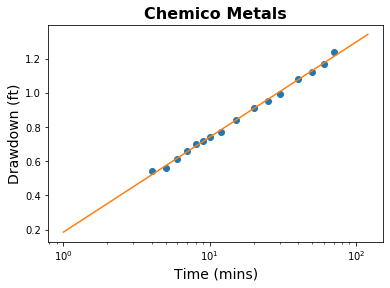

The Jacob Straight Line Method indicates that for Olin #3, T is 39010.0 ft^2/d and S is 0.00132 .


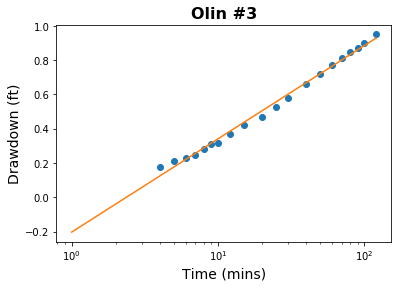

The Jacob Straight Line Method indicates that for Olin #4, T is 47890.0 ft^2/d and S is 0.00171 .


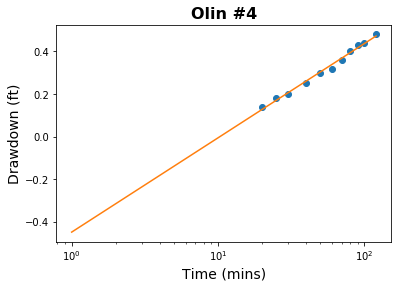

The Jacob Straight Line Method indicates that for Olin #5, T is 98130.0 ft^2/d and S is 0.00165 .


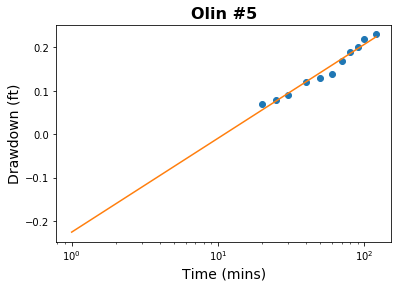

In [99]:
jacob_straight('Chemico Metals',df_chemico,250,101.597)
jacob_straight('Olin #3',df_olin3,330,80.4757)
jacob_straight('Olin #4',df_olin4,670,80.4757)
jacob_straight('Olin #5',df_olin5,1010,80.4757)

  
    
## Theis Curve Fitting
The Jacob Straight Line method is based on an approximation of the Theis solution. However, there is another option available when using Python, fitting the Theis solution directly to the data, with S and T as the unknown parameters.

**<font size = 6>Theis equation**

Non-equilibrium radial flow in a confined aquifer:

<font size = 5>$s=\frac{Q}{4\pi T}W(u)$

<font size = 5>$u=\frac{r^2S}{4Tt}$

where:

$T$ = Transmissivity ($L^2/T$)

$S$ = Storativity (unitless)

$s$ = drawdown =$h_0 – h$ ($L$)

$Q$ = Pumping rate ($L^3/T$)

$r$ = radial distance of observation well ($L$)

$t$ = elapsed time since pumping began or ended ($T$)

$W(u)$ = well function


In [100]:
def theis_opt(sitename, df, r, Q): 
    # The new dataset drops the first four and the last four numbers
    dd=df['drawdown'][4:-4]  
    def theis_line(x,S,T):  # function to calculate Theis equation
      u=r**2*S/(4*T*x)
      return Q/(4*np.pi*T)*sps.exp1(u)
    # fit the modified data to the Theis equation
    para, cova = spo.curve_fit(theis_line,dd.index, dd, bounds=(0, [1, 1000]))  

    xx=np.arange(1,151) 
    S=para[0]
    T=para[1]
    yy=theis_line(xx,S,T)
    plt.figure(facecolor="white")
    plt.semilogx(dd,'o',xx,yy) # plot the curve
    plt.xlabel('Time (mins)',fontsize=14)
    plt.ylabel('Drawdown (ft)',fontsize=14)
    plt.title(sitename,fontweight="bold",fontsize=16)
    plt.show()
    print(
        'The Theis curve fitting Method indicates that for ' +
        sitename + ', T is', round(T * 60 * 24, -1), 'ft^2/d and S is',
        round(S, 5), '.')
    return

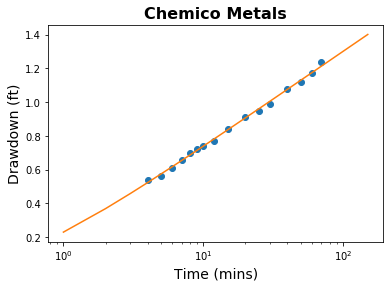

The Theis curve fitting Method indicates that for Chemico Metals, T is 47200.0 ft^2/d and S is 0.00061 .


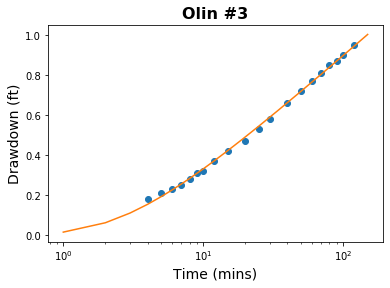

The Theis curve fitting Method indicates that for Olin #3, T is 34720.0 ft^2/d and S is 0.00173 .


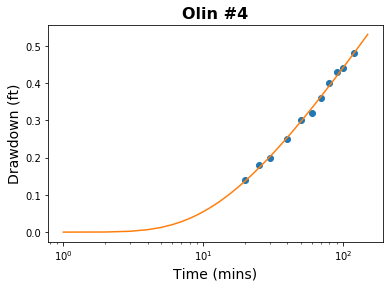

The Theis curve fitting Method indicates that for Olin #4, T is 38550.0 ft^2/d and S is 0.00233 .


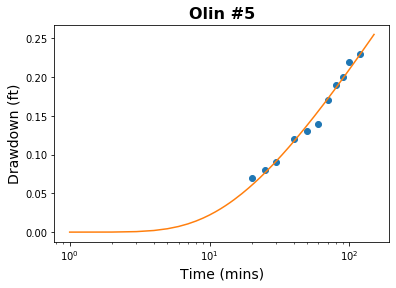

The Theis curve fitting Method indicates that for Olin #5, T is 75700.0 ft^2/d and S is 0.0023 .


In [101]:
theis_opt('Chemico Metals',df_chemico,250,101.597)
theis_opt('Olin #3',df_olin3,330,80.4757)
theis_opt('Olin #4',df_olin4,670,80.4757)
theis_opt('Olin #5',df_olin5,1010,80.4757)